# Directing customers to subscription products through app behavior analysis

Goal: Convert free users into paid members. The objective is to identify customers that are most likely not to enroll in the paid products, so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody. Especiaally customers who are likely to enroll anyway.

## EDA

In [239]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [240]:
df  = pd.read_csv("appdata10.csv")
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [241]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


**Observations**
- Average age is around 31.72
- Average number of screens viewed is about 15.7
- On average around 10.78% of users have played the minigame
- On average around 17.2% of users have used the premium feature
- On average around 62.14% have enrolled and 16.5% of users have liked one feature.

Hour column needs preprocessing

In [242]:
df["hour"] = df.hour.str.slice(1,3).astype(int)

In [243]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [244]:
# Selecting only numerical columns
df2 = df.copy().drop(columns = ["user", "screen_list", "enrolled_date", "first_open", "enrolled"])
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


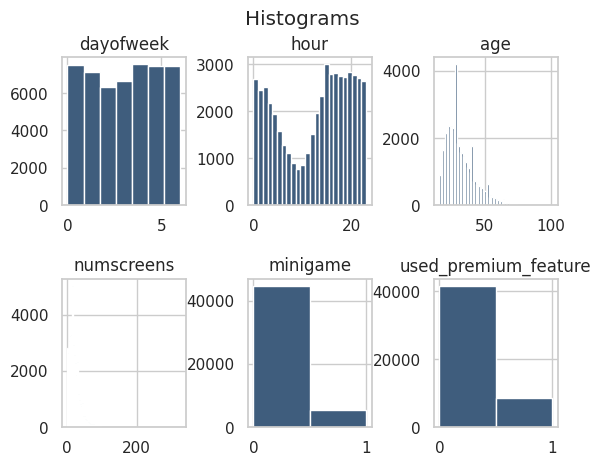

In [245]:
# Histograms


fig, axs = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.5, wspace = 0.5)  # Adjust the vertical space between the subplots
fig.suptitle("Histograms")


for i in range(1, len(df2.columns)):
    plt.subplot(2, 3, i)
    f = plt.gca()

    f.set_title(df2.columns.values[i-1])

    vals = np.size(df2.iloc[:, i-1].unique())
    plt.hist(df2.iloc[:, i-1], bins=vals, color="#3F5D7D")


**Observations**

- Day of the week seems to have a very even distribution. No particular day seems to be favoroute when it comes to users installing the application.
- There is a very big dip in hour, around 8-10. Hours in this dataset, hours are in Coordinated Universal Time (UTC), which is a time standard used globally. UTC hours refer to the time expressed in hours according to the UTC time zone. It is used to denote a specific hour of the day in a standardized way that is not affected by time zone offsets or daylight saving time changes.

 For example, if it is 10:00 AM in UTC, it means it is 10 hours after midnight in the UTC time zone. 

 10 AM UTC - 8 hours = 2 AM PST.

 We see that this is very early in the morning, which makes sense why there is a dip in the number of enrolment at this hour.

- For age, we see a few jumps  around 30, 40, and 55. Most people seem to be around 20-30, and the distribution stats to tail off after 40.



<Axes: title={'center': 'Correlation with Response'}>

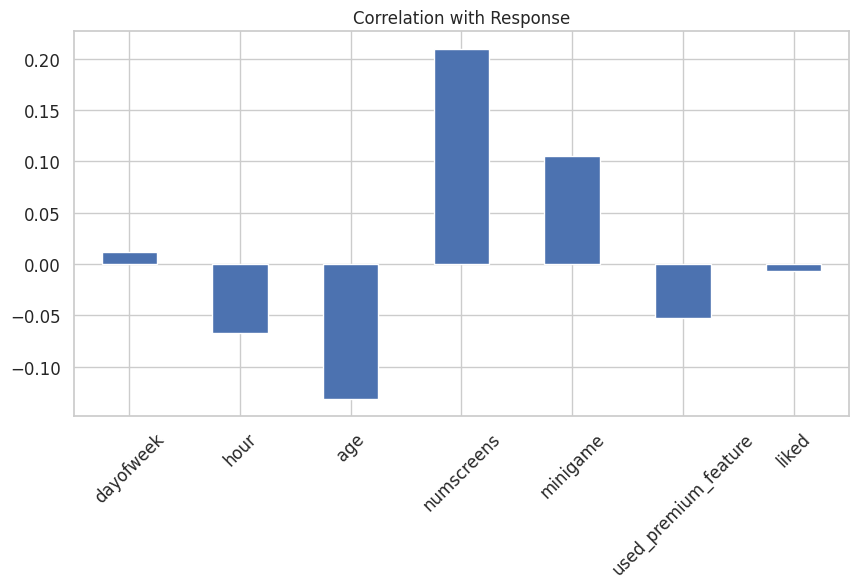

In [246]:
# Correlation with Response

df2.corrwith(df.enrolled).plot.bar(figsize = (10,5), 
                                   title = "Correlation with Response",
                                   fontsize = 12, rot = 45, grid = True)

**Observations**

- numscreens has a positive correlation of 0.209457 with the response variable. This suggests that there is a moderate positive relationship between the number of screens used by the user and their likelihood of paying for a subscription. In other words, users who interact with more screens within the app are more likely to pay for a subscription.

- minigame has a positive correlation of 0.104979 with the response variable. This indicates a smaller positive relationship between engaging in the mini-game feature and the likelihood of paying for a subscription. Users who participate in the mini-game feature might have a slightly higher tendency to subscribe.

- age has a negative correlation of -0.131303 with the response variable. This suggests a moderate negative relationship between a user's age and their likelihood of paying for a subscription. Older users might be less inclined to subscribe compared to younger users.

- used_premium_feature has a negative correlation of -0.052703 with the response variable. This implies a weak negative relationship between using the premium features and the likelihood of paying for a subscription. Users who have used the premium features might be slightly less likely to subscribe.

In [247]:
df2.corrwith(df.enrolled)

dayofweek               0.011326
hour                   -0.066694
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
liked                  -0.007022
dtype: float64

<ipython-input-248-d13953398312>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


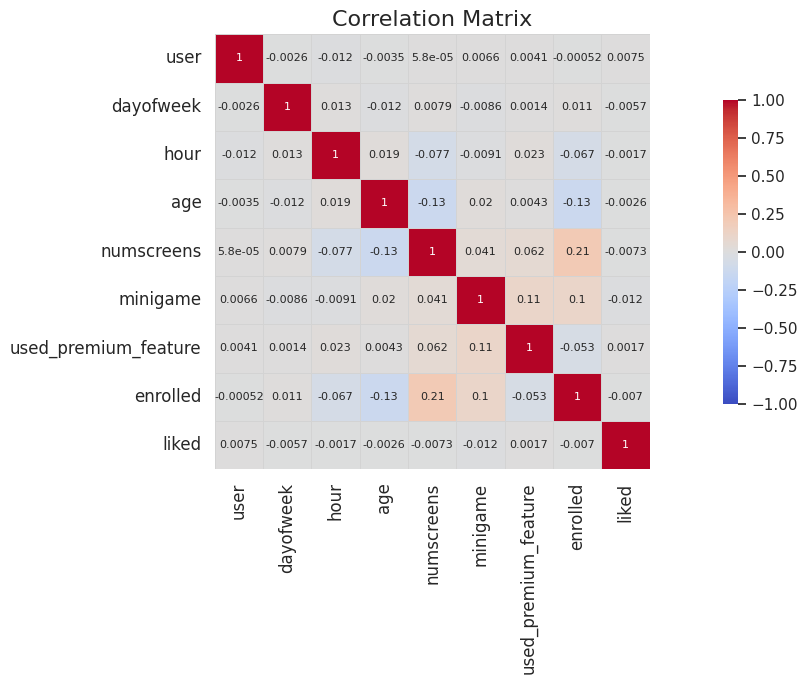

In [248]:
# Correlation Matrix, to check for multi-collinearity

# Compute the correlation matrix
corr_matrix = df.corr()

# Set a custom color palette
color_palette = sns.color_palette("coolwarm", as_cmap=True)

# Create a custom theme
sns.set_theme(style='whitegrid')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, cmap=color_palette, vmin=-1, vmax=1,
            linewidths=0.5, linecolor='lightgray', square=True, cbar=True, cbar_kws={'shrink': 0.7}, annot_kws={'fontsize': 8})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Observations**

- Overall, there are no strong correlations (absolute values close to 1.0) between any pair of variables in the dataset. This suggests that there is no severe multicollinearity issue among the variables.

## Feature Engineering

In [249]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [250]:
df["first_open"] = [parser.parse(row_data) for row_data in df["first_open"]]

In [251]:
df["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in df["enrolled_date"]]

In [252]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [253]:
df["difference"] = (df.enrolled_date - df.first_open).astype("timedelta64[h]") # difference between enrol and first open the app

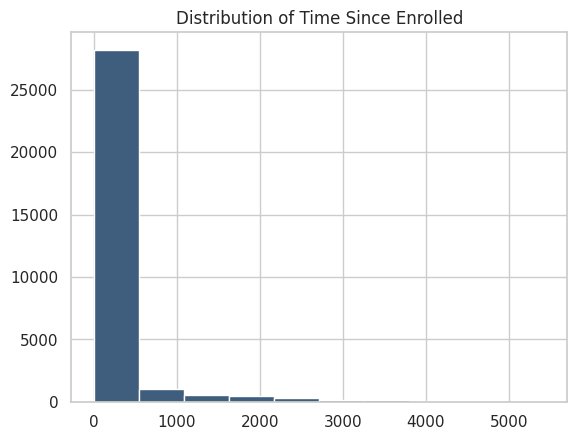

In [254]:
plt.hist(df["difference"].dropna(), color = "#3F5D7D")
plt.title("Distribution of Time Since Enrolled")
plt.show()

**Observations**
- Most people enroll within the first 500 hour. 

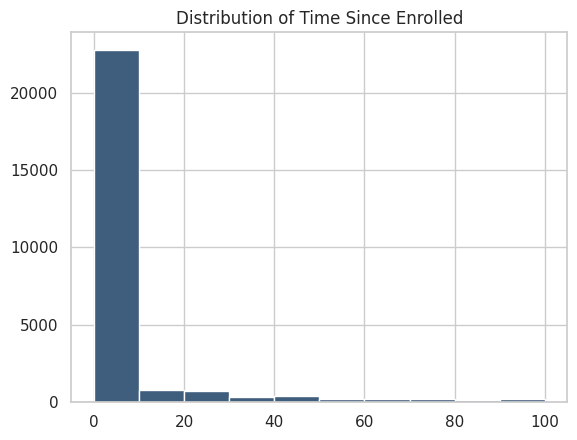

In [255]:
plt.hist(df["difference"].dropna(), color = "#3F5D7D", range = [0,100])
plt.title("Distribution of Time Since Enrolled")
plt.show()

**Observations** 
- Upon further inspection, we see that this enrollment happens most within the first 10 hours.

In [256]:
df.loc[df.difference > 48, 'enrolled'] = 0
df = df.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [257]:
# Applying feature enginerring to screen_list

# using separate csv file, containing domain expertise.
top_screens = pd.read_csv("top_screens.csv").top_screens.values


df["screen_list"] = df.screen_list.astype(str) + ","

In [258]:
for sc in top_screens:
  df[sc] = df.screen_list.str.contains(sc).astype(int)
  df["screen_list"] = df.screen_list.str.replace(sc+",", "")

In [259]:
df["Other"] = df.screen_list.str.count(",")

In [260]:
df = df.drop(columns = ["screen_list"])

In [261]:
# Funnels, correlated screens, grouping screens. 
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)


In [262]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


## Data Pre-Processing

In [263]:
import time

In [264]:
y = df["enrolled"]
df = df.drop(columns = "enrolled")

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test= train_test_split(df, y, 
                                                   test_size = 0.2, 
                                                   random_state = 0)

In [267]:
# Remove user id from features, however we need to save it

# Removing Identifiers
train_identity = X_train["user"]
X_train = X_train.drop(columns = ["user"])
test_identity = X_test["user"]
X_test = X_test.drop(columns = ["user"])

In [268]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # Converts to numpy, loses column names and index
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test

## Model Building

In [281]:
# Import logistic regression

# l2 (Lasso) regularization model because of some relationships between different screens. The regularization can add a penality for this.

from sklearn.linear_model import LogisticRegression

cl = LogisticRegression(random_state = 0, penalty = "l2")

# Fit
cl.fit(X_train, y_train)

# Predicting 
y_pred = cl.predict(X_test)


In [293]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
# Accuracy score
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

# Precision score
print("Precision: {:.4f}".format(precision_score(y_test, y_pred))) # tp / (tp + fp)

# Recall score
print("Recall: {:.4f}".format(recall_score(y_test, y_pred))) # tp / (tp + fn)

# F1 score
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))



Accuracy: 0.6839
Precision: 0.7428
Recall: 0.5485
F1 Score: 0.6310


Test Data Accuracy: 0.6839


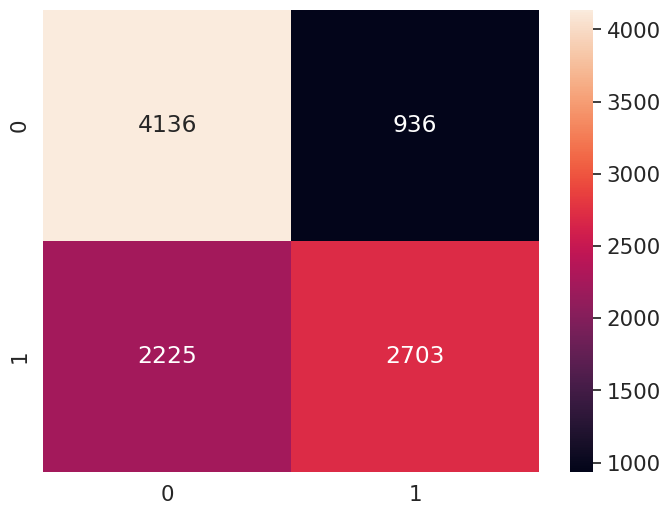

In [294]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt="g")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [296]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = cl, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.767 (+/- 0.009)


In [298]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(df.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(cl.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.032715
1,hour,-0.003747
2,age,-0.149793
3,numscreens,-0.131250
4,minigame,-0.026619
5,used_premium_feature,-0.066105
6,liked,0.010852
7,location,-0.028831
8,Institutions,-0.062297
9,VerifyPhone,0.650615


In [300]:
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)


In [301]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,0
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
